## <font color='dark'>Projeto Análise de Dados para Campanhas de Marketing de Instituições Financeiras</font>

Analisaremos dados referentes a campanhas de marketing direto de uma instituição bancária.  
As campanhas de marketing foram baseadas em ligações telefônicas.  
Muitas vezes, era necessário mais de um contato para o mesmo cliente, a fim de saber se o produto (depósito bancário a prazo) seria ('sim') ou não ('não') adquirido pelo cliente.  
O dataset apresenta diversos problemas pois é um dataset com dados reais.  
Darei ênfase ao tratamento de valores ausentes, mas também na limpeza e tratamento de outros eventuais problemas.

In [1]:
!pip install -q -U watermark

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys, os
warnings.filterwarnings("ignore")

In [3]:
# Utilizarei 3 funções criadas com estratégias de limpeza diferentes, Vamos adicionar caminho para os módulos Python
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

## Carregando os Dados

In [4]:
df = pd.read_csv("dados/dataset.csv")

In [5]:
# Tamanho do dataset
df.shape

(45211, 19)

In [6]:
# Amostra dos dados
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Análise Exploratória

In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [8]:
# Verificando valores nulos
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [9]:
# Contando valores nulos por coluna
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [10]:
# Não usaremos a coluna ID, então vou remover.
df.drop(["customerid"], axis = 1, inplace = True)

In [11]:
# Colunas
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [13]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


> Analisando a coluna "jobedu" verifiquei que duas informações. Então vou separar em duas colunas.

In [15]:
df[['job', 'education']] = df['jobedu'].str.split(',', expand=True)

In [16]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'job', 'education'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45191 non-null  float64
 1   salary     45185 non-null  float64
 2   balance    45211 non-null  int64  
 3   marital    45211 non-null  object 
 4   jobedu     45211 non-null  object 
 5   targeted   45211 non-null  object 
 6   default    45211 non-null  object 
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45161 non-null  object 
 12  duration   45211 non-null  object 
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  response   45181 non-null  object 
 18  job        45211 non-null  object 
 19  education  45211 non-null  object 
dtypes: flo

In [18]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [19]:
# Após a divisão irei excluir a coluna 'jobedu'
df.drop(["jobedu"], axis = 1, inplace = True)

In [20]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## Tratamento e Valores Ausentes

#### Tratamento da variável que representa a idade.

In [21]:
# Valores ausentes no dataframe
df.isna().any()

age           True
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [22]:
# Valores ausentes da variável age
df.age.isnull().mean()*100

0.0442370219636814

Como o percentual é baixo não vou eliminar a coluna. Poderia então eliminar os registros com valores ausentes (nesse caso perderíamos 20 linhas no dataset) ou aplicar imputação. Para essa variável vou usar imputação.

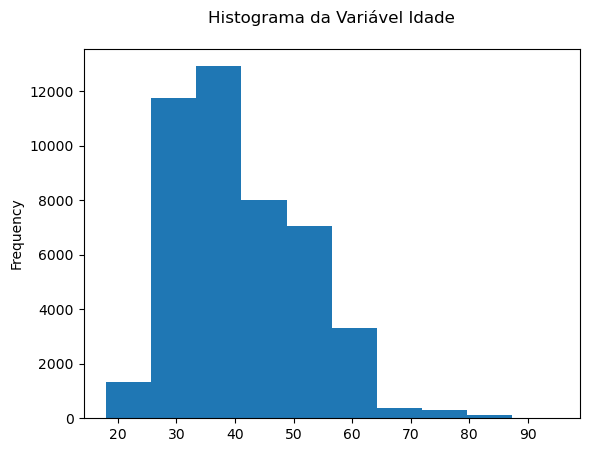

In [23]:
# Histograma
df.age.plot(kind = "hist")
plt.title("Histograma da Variável Idade\n")
plt.show()

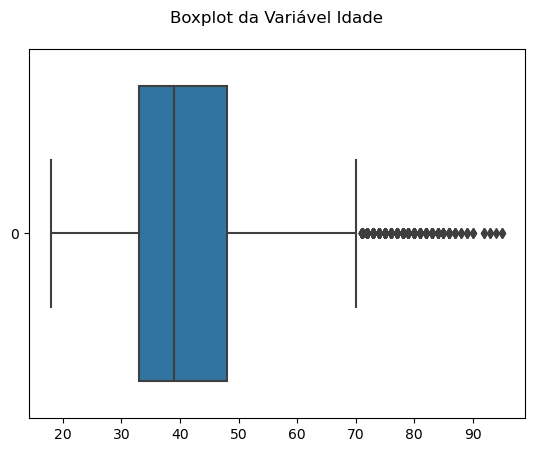

In [24]:
# Boxplot
sns.boxplot(df.age, orient = "h")
plt.title("Boxplot da Variável Idade\n")
plt.show()

In [25]:
# Média de idade
df.age.mean()

40.93565090394105

In [26]:
# Mediana, valor do meio da distribuição quando os dados estão ordenados.
df.age.median()

39.0

In [27]:
# Moda, valor que aparece com mais frequência.
df.age.mode()

0    32.0
Name: age, dtype: float64

> Farei a imputação dos valores ausentes da variável age com uma medida de tendência central. Para essa variável vou preencher com a moda pois são poucos valores ausentes e assim alteramos muito pouco o padrão dos dados.

In [28]:
# Moda
df.age.fillna("32", inplace = True)

In [29]:
# Converte para int
convert_to_int(df, ['age'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   salary     45185 non-null  float64
 2   balance    45211 non-null  int64  
 3   marital    45211 non-null  object 
 4   targeted   45211 non-null  object 
 5   default    45211 non-null  object 
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45211 non-null  object 
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  response   45181 non-null  object 
 17  job        45211 non-null  object 
 18  education  45211 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

In [31]:
# Tipo da variável
df.age.dtypes

dtype('int64')

In [32]:
# Média
df.age.mean()

40.93169803808808

In [33]:
# Mediana
df.age.median()

39.0

In [34]:
# Percentual de valores ausentes
df.age.isnull().mean()*100

0.0

#### Tratamento de Valores Ausentes da variável que representa o mês

In [36]:
# Valores ausentes na variável
df.month.isnull().sum()

50

In [37]:
# Percentual de valores ausentes
df.month.isnull().mean()*100

0.11059255490920351

> Como o percentual é menor que 30% não posso eliminar a coluna. Poderia eliminar os registros com valores ausentes (nesse caso perderíamos 50 linhas no dataset) ou aplicar imputação, vou usar a segunda opção.

In [38]:
# Tipo da variável
df.month.dtypes

dtype('O')

In [39]:
# Categorias da variável
df.month.value_counts(dropna = False)

month
may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
NaN             50
Name: count, dtype: int64

> Irei imputar os valores ausentes da variável month com a moda, o valor mais frequente da variável, pois são poucos registros. 

In [40]:
# Moda 
df.month.mode()

0    may, 2017
Name: month, dtype: object

In [41]:
# Imputação com a moda
df.month.fillna("may, 2017", inplace = True)

In [42]:
# Valores ausentes tratados com sucesso
df.month.isnull().sum()

0

In [43]:
df.month.isnull().mean()*100

0.0

#### Tratamento da Variável que representa o salário

In [44]:
# Valores ausentes na variável
df.salary.isnull().sum()

26

In [45]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.05750812855278583

> Como o percentual é baixo também não eliminar a coluna. Poderia eliminar os registros com valores ausentes (nesse caso perderíamos 26 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

In [46]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


Verificando uma amostra dos dados, percebemos que há o valor zero, que é provavelmente um valor ausente.

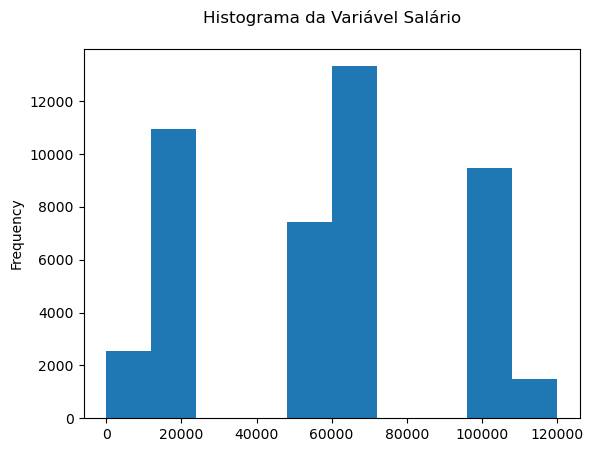

In [47]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

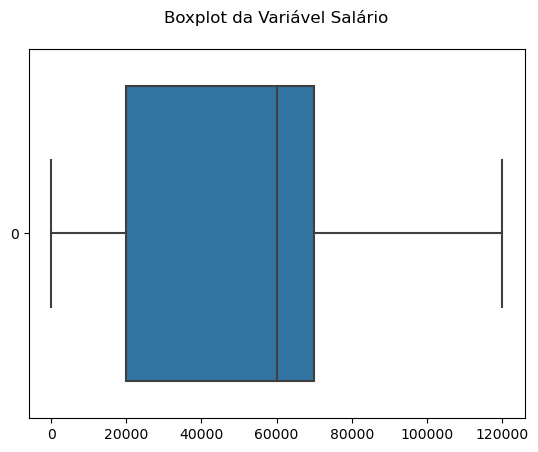

In [48]:
# Boxplot
sns.boxplot(df.salary, orient = "h")
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [49]:
# Média de salário
df.salary.mean()

57008.65331415293

In [50]:
# Mediana
df.salary.median()

60000.0

In [51]:
# Moda
df.salary.mode()

0    20000.0
Name: salary, dtype: float64

> Irei imputar os valores ausentes da variável salary com uma medida de tendência central, utilizarei a mediana, pois os dados parecem assimétricos (nesse caso a média não pode ser usada)e o valor mais frequente está muito abaixo da média e da mediana (por isso não usaremos a moda). Irei também tratar os valores iguais a zero com uma imputação.

In [52]:
# Imputando a mediana
df.salary.fillna("60000", inplace = True)

In [53]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [55]:
# Tipo (ao preencher os valores ausentes utilizando as aspas, o tipo foi convertido para object)
df.salary.dtypes

dtype('O')

In [56]:
# Converter para tipo float
df.salary = df.salary.astype("float")

In [57]:
df.salary.dtypes

dtype('float64')

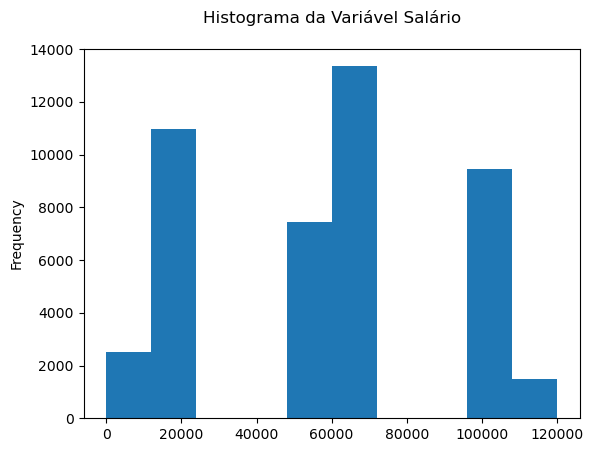

In [58]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

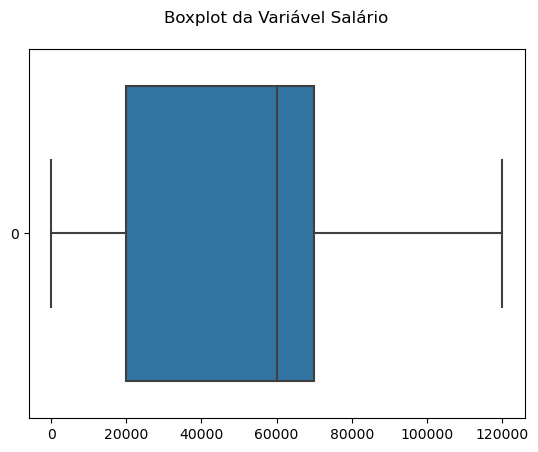

In [59]:
# Boxplot
sns.boxplot(df.salary, orient = "h")
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [60]:
# Registros para cada salário
df.salary.value_counts()

salary
20000.0     9725
100000.0    9454
60000.0     9195
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
Name: count, dtype: int64

In [61]:
df.salary = df.salary.replace(0, df.salary.median())

In [62]:
# Registros para cada salário
df.salary.value_counts()

salary
20000.0     9725
60000.0     9483
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
Name: count, dtype: int64

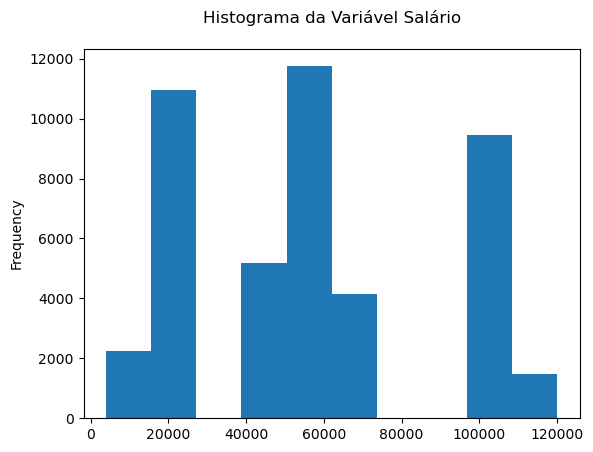

In [63]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

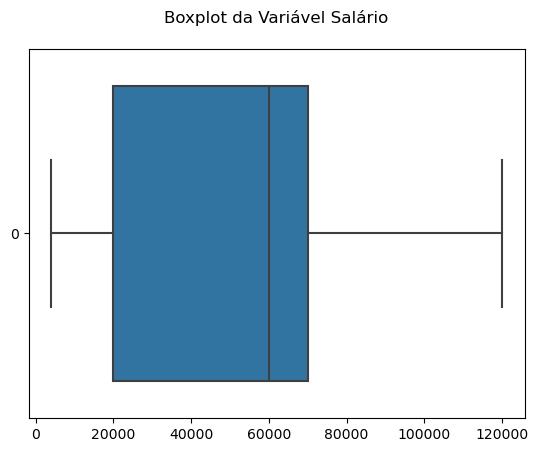

In [64]:
# Boxplot
sns.boxplot(df.salary, orient = "h")
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [65]:
df.salary.isnull().mean()*100

0.0

In [66]:
df.isna().any()

age          False
salary       False
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

#### Tratamento da Variável que representa a resposta (variável alvo).

In [67]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [68]:
# Valores ausentes
df.response.isnull().sum()

30

In [69]:
# Percentual
df.response.isnull().mean()*100

0.0663555329455221

Como o percentual é baixo (e a variável é o alvo da nossa análise) não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 30 linhas no dataset) ou podemos aplicar imputação.

In [70]:
# Registros
df.response.value_counts()

response
no     39894
yes     5287
Name: count, dtype: int64

In [71]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [72]:
# Não devemos aplicar imputação na variável de estudo (variável resposta ou variável alvo)
# Vamos dropar os resgistros
df.dropna(subset = ['response'], inplace = True)

In [73]:
# Verifica valores NA
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### Tratamento da Variável pdays

In [74]:
# Valores ausentes
df.pdays.isnull().sum()

0

In [75]:
# Describe
df.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indica valor ausente

In [76]:
# Vamos fazer o replace de -1 por NaN
df.pdays = df.pdays.replace({-1.0:np.NaN})

In [77]:
# Valores ausentes
df.pdays.isnull().sum()

36930

In [78]:
# Percentual
df.pdays.isnull().mean()*100

81.73789867422147

In [79]:
# Drop da coluna "pdays" pois tem mais de 30% dos valores ausentes
df.drop(["pdays"], axis = 1, inplace = True)

In [80]:
# Valores ausentes
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Conclusão e Análise dos Dados

### Análise Univariada

In [81]:
# Proporção da Variável de estado civil
df.marital.value_counts(normalize = True)

marital
married     0.601912
single      0.282907
divorced    0.115181
Name: proportion, dtype: float64

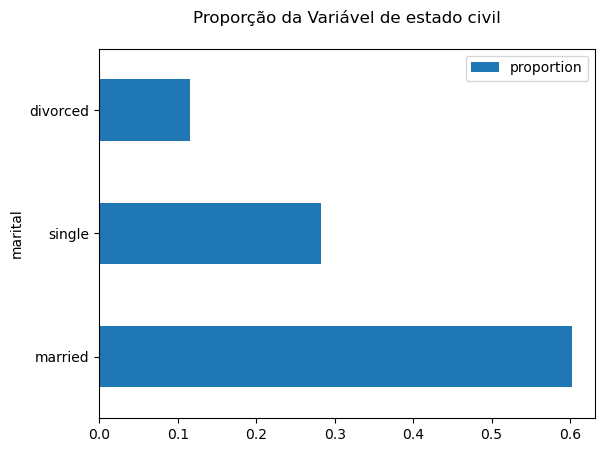

In [82]:
# Plot
df.marital.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da Variável de estado civil\n")
plt.legend()
plt.show()

In [83]:
# Proporção da variável de job
df.job.value_counts(normalize = True)

job
blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: proportion, dtype: float64

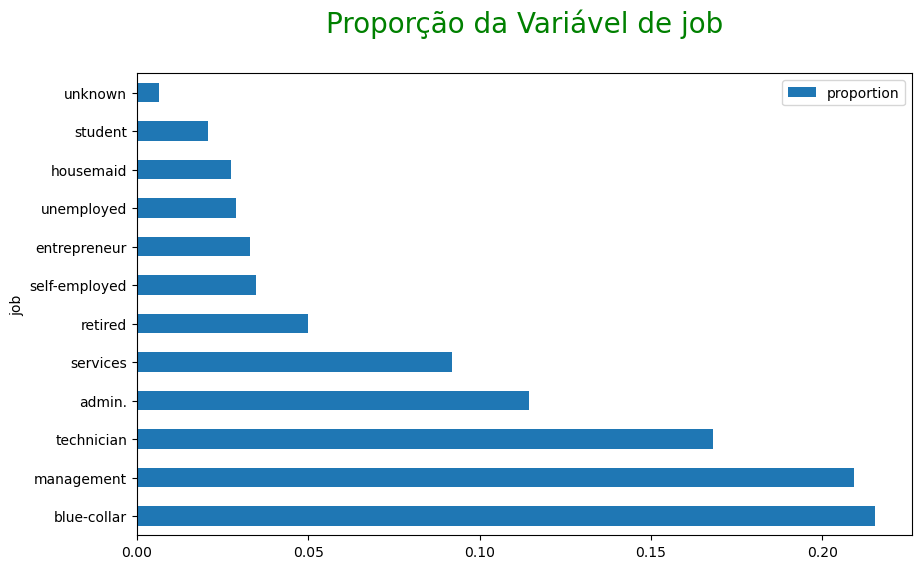

In [84]:
# Plot
plt.figure(figsize = (10,6))
df.job.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da Variável de job\n", fontdict = {'fontsize' : 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

In [85]:
# Proporção da variável de education
df.education.value_counts(normalize = True)

education
secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: proportion, dtype: float64

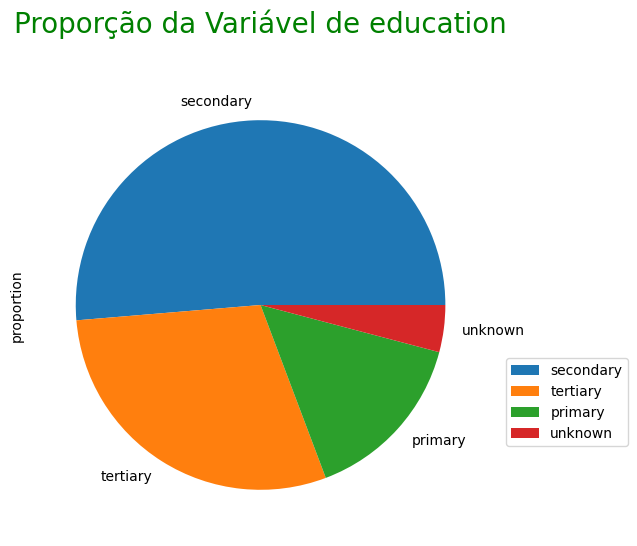

In [86]:
# Plot
plt.figure(figsize = (10,6))
df.education.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da Variável de education\n", fontdict = {'fontsize' : 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

In [87]:
# Proporção da variável de education
df.education.value_counts(normalize = True)

education
secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: proportion, dtype: float64

In [88]:
# Proporção da variável de response
df.response.value_counts(normalize = True)

response
no     0.882982
yes    0.117018
Name: proportion, dtype: float64

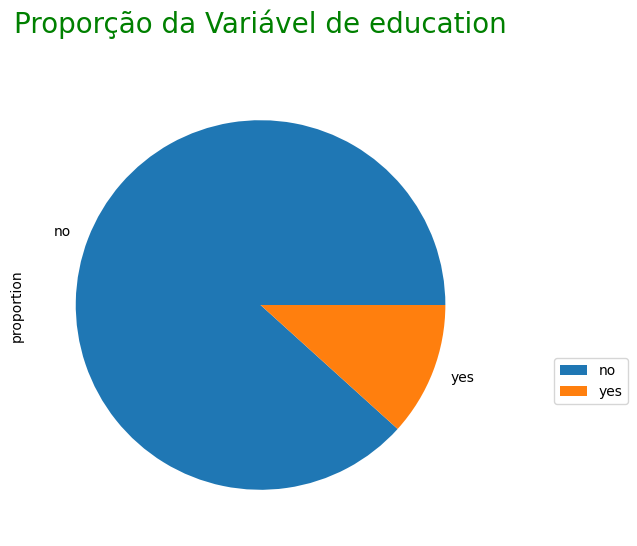

In [89]:
# Plot
plt.figure(figsize = (10,6))
df.response.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da Variável de education\n", fontdict = {'fontsize' : 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

## Análise Multivariada

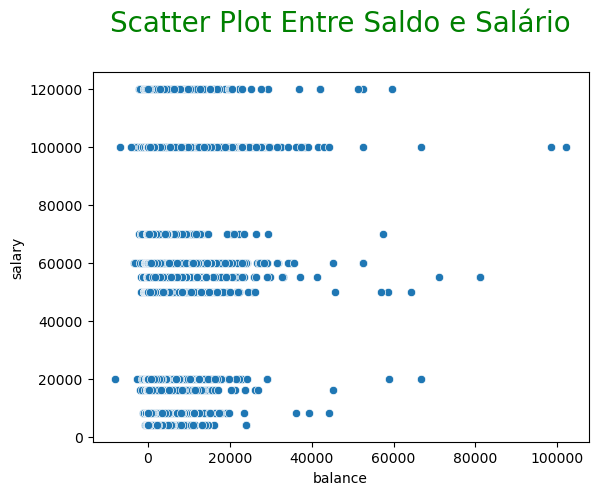

In [90]:
# Scatter Plot
sns.scatterplot(x=df["balance"], y=df["salary"])
plt.title("Scatter Plot Entre Saldo e Salário\n", fontdict = {'fontsize' : 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

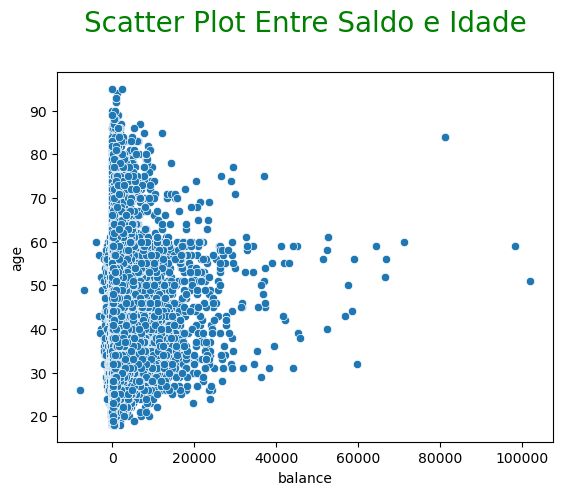

In [91]:
# Scatter Plot
sns.scatterplot(x=df["balance"], y=df["age"])
plt.title("Scatter Plot Entre Saldo e Idade\n", fontdict = {'fontsize' : 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

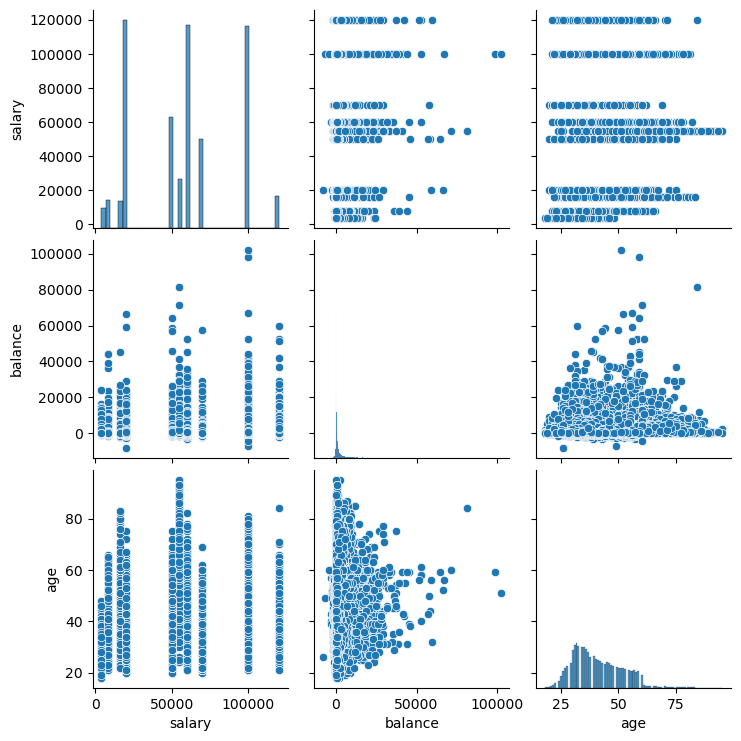

In [92]:
# Pair Plor
sns.pairplot(df[["salary","balance","age"]])
plt.show()

In [93]:
# Correlação
res = df[["salary","balance","age"]].corr()

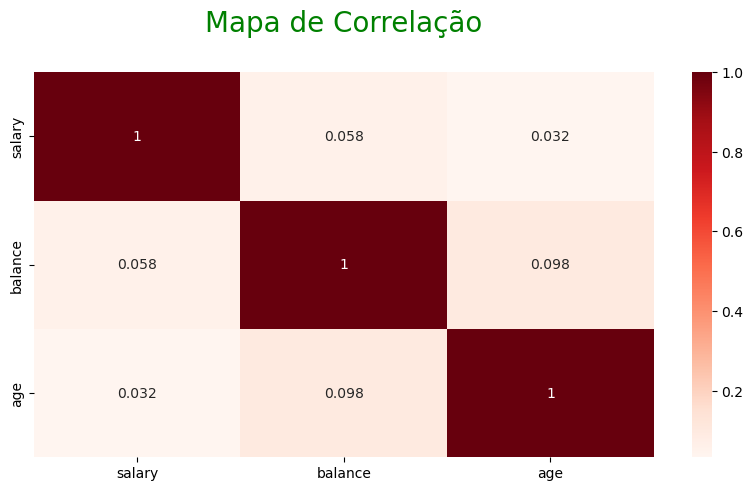

In [94]:
# Mapa de Correlação
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize' : 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

## Numérico X Categórico

In [95]:
# Agrupa o salário pela variável resposta e calcula a média
df.groupby(by = ["response"])["salary"].mean()

response
no     57157.692886
yes    59157.556270
Name: salary, dtype: float64

In [96]:
# Agrupa o salário pela variável resposta e calcula a média
df.groupby(by = ["response"])["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

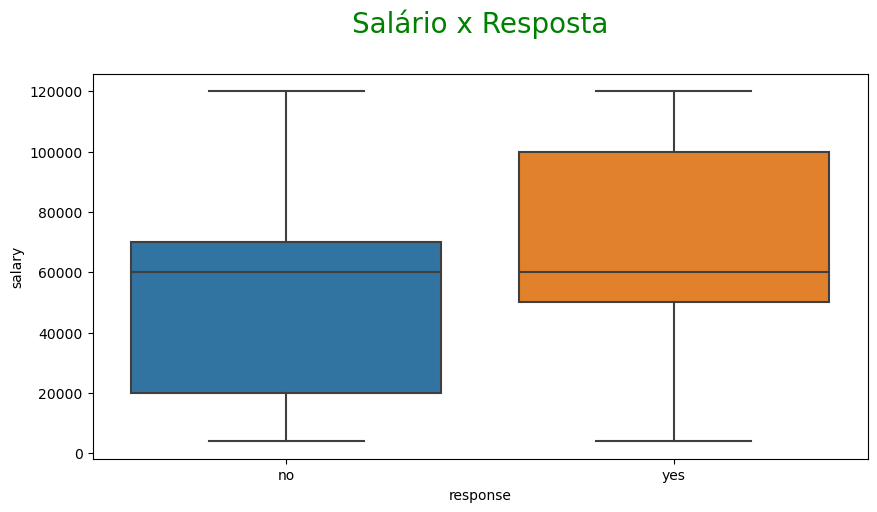

In [97]:
# Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(x=df["response"], y=df["salary"])
plt.title("Salário x Resposta\n", fontdict = {'fontsize' : 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [98]:
# Agrupa educação por salário e calcula a média
df.groupby(by = ["education"])["salary"].mean()

education
primary      34697.106955
secondary    49922.420113
tertiary     83041.077340
unknown      50708.512931
Name: salary, dtype: float64

In [99]:
# Cria a variável response_flag como tipo numérico onde response "yes"=1, "no"=0
df["response_flag"] = np.where(df["response"] == "yes",1,0)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education,response_flag
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary,0
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary,0
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary,0
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown,0
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown,0


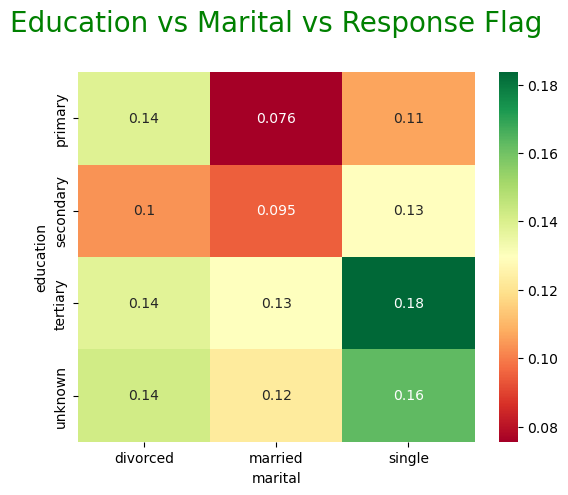

In [100]:
# Mapa de Correlação
res1 = df.pivot_table(index = "education", columns = "marital", values = "response_flag", aggfunc = "mean")
sns.heatmap(res1, annot = True, cmap = "RdYlGn")
plt.title("Education vs Marital vs Response Flag\n", fontdict = {'fontsize' : 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()